In [1]:
import tensorflow as tf
from tensorflow import keras

In [2]:
keras.__version__

'2.12.0'

In [3]:
fashion_mnist = keras.datasets.fashion_mnist#loading for mnist fashion dataset on cloud
(X_train_full,y_train_full),(X_test,y_test)= fashion_mnist.load_data()


In [4]:
X_train_full.shape

(60000, 28, 28)

In [5]:
X_test.shape

(10000, 28, 28)

In [6]:
X_valid, X_train = X_train_full[50000:]/255.,X_train_full[:50000]/255.
y_valid, y_train = y_train_full[50000:],y_train_full[:50000]
x_test = X_test/ 255.

In [7]:
X_train_full.dtype#pixel values from 0 to 255

dtype('uint8')

In [8]:
X_valid.shape

(10000, 28, 28)

In [9]:
X_train.shape

(50000, 28, 28)

In [10]:
X_valid, X_train = X_train_full[50000:]/255.,X_train_full[:50000]/255.
y_valid, y_train = y_train_full[50000:],y_train_full[:50000]
x_test = X_test/ 255.#preprocessing for the testing dataset as the training and validation

In [11]:
import matplotlib.pyplot as plt

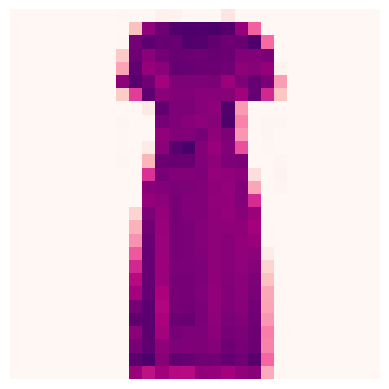

In [12]:
plt.imshow(X_train[50],cmap='RdPu')
plt.axis('off')
plt.show()

In [13]:
y_test

array([9, 2, 1, ..., 8, 1, 5], dtype=uint8)

In [14]:
class_names = ['T-shirt/top','Trouser','Pullover','Dress','Coat','Sandal','Shirt','Sneaker','Bag','Ankle boot']

In [15]:
y_train[50]

3

In [16]:
class_names[y_train[50]]

'Dress'

In [17]:
from os import name
model = keras.models.Sequential()
model.add(keras.layers.Flatten(input_shape=[28,28],name='abc'))
model.add(keras.layers.Dense(300, activation='relu',name='FirstDense'))
model.add(keras.layers.Dense(100, activation='relu'))
model.add(keras.layers.Dense(10, activation='softmax'))


In [18]:
model.layers

In [19]:
model.summary()

Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 abc (Flatten)               (None, 784)               0         
                                                                 
 FirstDense (Dense)          (None, 300)               235500    
                                                                 
 dense (Dense)               (None, 100)               30100     
                                                                 
 dense_1 (Dense)             (None, 10)                1010      
                                                                 
Total params: 266,610
Trainable params: 266,610
Non-trainable params: 0
_________________________________________________________________


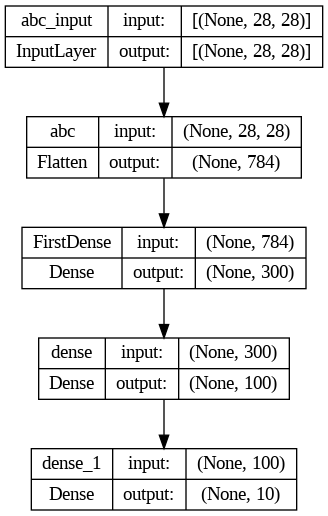

In [20]:
keras.utils.plot_model(model,'fashion_mnist.png',show_shapes=True)

In [21]:
hidden1 = model.layers[1]
hidden1.name

'FirstDense'

In [22]:
weights, biases = hidden1.get_weights()

In [23]:
weights.shape

(784, 300)

In [24]:
biases.shape


(300,)

In [25]:
model.compile(loss='sparse_categorical_crossentropy', optimizer='sgd',metrics=['accuracy'])

In [26]:
history = model.fit(X_train,y_train,epochs=30,validation_data=(X_valid,y_valid))

Epoch 1/30
1563/1563 [==============================] - 13s 6ms/step - loss: 0.7409 - accuracy: 0.7582 - val_loss: 0.5442 - val_accuracy: 0.8153
Epoch 2/30
1563/1563 [==============================] - 6s 4ms/step - loss: 0.4962 - accuracy: 0.8288 - val_loss: 0.4771 - val_accuracy: 0.8267
Epoch 3/30
1563/1563 [==============================] - 6s 4ms/step - loss: 0.4478 - accuracy: 0.8435 - val_loss: 0.4445 - val_accuracy: 0.8430
Epoch 4/30
1563/1563 [==============================] - 5s 3ms/step - loss: 0.4211 - accuracy: 0.8529 - val_loss: 0.4463 - val_accuracy: 0.8442
Epoch 5/30
1563/1563 [==============================] - 6s 4ms/step - loss: 0.3984 - accuracy: 0.8615 - val_loss: 0.4233 - val_accuracy: 0.8504
Epoch 6/30
1563/1563 [==============================] - 8s 5ms/step - loss: 0.3822 - accuracy: 0.8666 - val_loss: 0.3977 - val_accuracy: 0.8598
Epoch 7/30
1563/1563 [==============================] - 10s 6ms/step - loss: 0.3695 - accuracy: 0.8709 - val_loss: 0.3959 - val_accurac

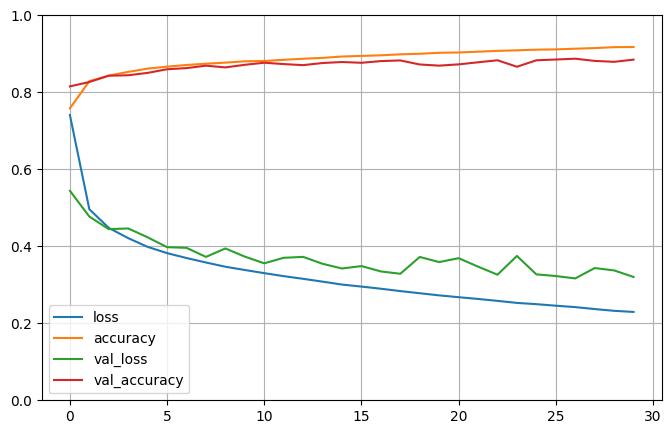

In [27]:
import pandas as pd
pd.DataFrame(history.history).plot(figsize=(8,5))
plt.grid(True)
plt.gca().set_ylim(0,1)
plt.show()

In [38]:
model.evaluate(x_test,y_test)

313/313 [==============================] - 1s 2ms/step - loss: 0.3384 - accuracy: 0.8814


[0.33835697174072266, 0.8813999891281128]

In [43]:
y_test[1]

2

In [54]:
X_new = x_test[:3]
yproba = model.predict(X_new)#predicted probabilities
yproba.round(2)


1/1 [==============================] - 0s 20ms/step


array([[0.  , 0.  , 0.  , 0.  , 0.  , 0.01, 0.  , 0.01, 0.  , 0.98],
       [0.  , 0.  , 0.99, 0.  , 0.01, 0.  , 0.  , 0.  , 0.  , 0.  ],
       [0.  , 1.  , 0.  , 0.  , 0.  , 0.  , 0.  , 0.  , 0.  , 0.  ]],
      dtype=float32)

In [62]:
ypred = np.argmax(model.predict(X_new),axis=-1)
ypred#predicted classesfrom the model

1/1 [==============================] - 0s 44ms/step


array([9, 2, 1])

In [64]:
np.array(class_names)[ypred]

array(['Ankle boot', 'Pullover', 'Trouser'], dtype='<U11')

In [66]:
ynew = y_test[:3]#groundtruth, true label, target value
ynew

array([9, 2, 1], dtype=uint8)

In [58]:
import numpy as np
model.evaluate(x_test[1][np.newaxis,:,:],y_test[:1])

1/1 [==============================] - 0s 26ms/step - loss: 24.0954 - accuracy: 0.0000e+00


[24.095382690429688, 0.0]

In [59]:
model.evaluate(X_test,y_test)

313/313 [==============================] - 1s 3ms/step - loss: 64.7359 - accuracy: 0.8487


[64.7358627319336, 0.8486999869346619]

In [60]:
model.evaluate(x_test,y_test)

313/313 [==============================] - 1s 2ms/step - loss: 0.3384 - accuracy: 0.8814


[0.33835697174072266, 0.8813999891281128]

In [57]:
x_test[:1].shape

(1, 28, 28)

In [ ]:
|np.asarray

In [27]:
model.fit(X_train,y_train,epochs=5,validation_data=(X_valid,y_valid))

Epoch 1/5
1563/1563 [==============================] - 6s 4ms/step - loss: 0.2257 - accuracy: 0.9205 - val_loss: 0.3173 - val_accuracy: 0.8878
Epoch 2/5
1563/1563 [==============================] - 5s 3ms/step - loss: 0.2210 - accuracy: 0.9214 - val_loss: 0.3432 - val_accuracy: 0.8750
Epoch 3/5
1563/1563 [==============================] - 6s 4ms/step - loss: 0.2186 - accuracy: 0.9219 - val_loss: 0.3125 - val_accuracy: 0.8884
Epoch 4/5
1563/1563 [==============================] - 5s 3ms/step - loss: 0.2149 - accuracy: 0.9226 - val_loss: 0.3249 - val_accuracy: 0.8853
Epoch 5/5
1563/1563 [==============================] - 6s 4ms/step - loss: 0.2111 - accuracy: 0.9240 - val_loss: 0.3176 - val_accuracy: 0.8875


In [ ]:
model = keras.models.Sequential([keras.layers.Flatten(input_shape=[28,28]),keras.layers.Dense(300, activation='relu')],keras.layers.Dense(100, activation='relu'),keras.layers.Dense(10, activation='softmax'))
